# Homogén adatok átalakítása modell tanításhoz

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
def load_data(fn): 
    with open(fn, 'rt') as f:
        types = next(f).rstrip().split(',')[1:]
        columns = next(f).rstrip().split(',')[1:]
        df = pd.read_csv(f, dtype=dict(zip(columns, types)), index_col=0, names=columns)
        return df

In [5]:
data_root = "data/"
datafn= "data.csv"

In [6]:
#raw_data =load_data(data_root+datafn)
raw_data=pd.read_pickle(data_root+'data.pkl')


In [7]:
raw_data.head()

,VONAL,VONATSZAM,VONTATO_TIPUS,ELOZO_ESEMENY_IDO,MENETREND_IDO,OSSZ_KESES,ELOZO_KESES,KESES,tx,t,...,E,ÁI,ÁE,Kezdés,Befejezés,"Kizárás (1=VZ,2=LJ)",Kiutalt menetvonalak zavartatása nélkül,Státus,ELOZO VONAT KESES,VONAL STATUSZ VALTOZOTT
0,70,2010,465,0.0,00:25:00,0.0,0.0,0.0,8.5,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
1,70,2010,465,2023-01-01 00:25:00,00:25:00,0 days 00:00:24,0.0,0.0,8.5,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
2,70,2010,465,2023-01-01 00:25:00,00:29:00,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,8.5,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
3,2,2010,465,2023-01-01 00:29:00,00:30:00,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,8.5,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False
4,2,2010,465,2023-01-01 00:30:00,00:35:00,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,8.5,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,False


In [8]:
import datetime
def convert_time_to_minute(input):
    if isinstance(input,datetime.time):
        return float(input.hour*60+input.minute)
    if isinstance(input,datetime.timedelta):
        ret = input.total_seconds()/60
       # if datetime.timedelta(0)>input:
       #     return -ret
        return ret
    if isinstance(input,float):
        return input
    return -1.0

In [9]:
# átalakítjuk időt percekké

In [10]:
raw_data[['MENETREND_IDO','ELOZO_KESES','ELOZO VONAT KESES','KESES']] = raw_data[['MENETREND_IDO','ELOZO_KESES','ELOZO VONAT KESES','KESES']].map(convert_time_to_minute)
raw_data['VONAL STATUSZ VALTOZOTT']=raw_data['VONAL STATUSZ VALTOZOTT'].head().astype(float)
raw_data.fillna(0.0,inplace=True)


In [11]:
#TODO boolean vs categorical?
#TODO Vonal, Line mit kellene kezdeni velük? kicsit kölséges használni őket..
#raw_data[['VONATSZAM','VONAL','VONTATO_TIPUS','Lassúmenet típusa','Kizárás (1=VZ,2=LJ)','Kiutalt menetvonalak zavartatása nélkül','Státus','Fels.vez. kikapcsolása']]=raw_data[['VONATSZAM','VONAL','VONTATO_TIPUS','Lassúmenet típusa','Kizárás (1=VZ,2=LJ)','Kiutalt menetvonalak zavartatása nélkül','Státus','Fels.vez. kikapcsolása']].astype("category")

# sklearn nem bír  category-kal
raw_data.drop(columns=['VONATSZAM','VONAL','VONTATO_TIPUS'],inplace=True)


In [12]:

#
raw_data=raw_data.drop(columns=['ELOZO_ESEMENY_IDO','ID','Kizárásszám','Kezdés','Befejezés','LINE','OSSZ_KESES'])


In [13]:
raw_data.dtypes


MENETREND_IDO                              float64
ELOZO_KESES                                float64
KESES                                      float64
tx                                         float64
t                                          float64
tn                                         float64
r                                          float64
TERV_IDOTARTAM                             float64
Érintett objektum típusa                   float64
Lassúmenet típusa                          float64
Lassúmenet hossza                          float64
Lassúmenet mértéke (km/h)                  float64
Lassúmenet mértéke motorvonatra (km/h)     float64
Fels.vez. kikapcsolása                     float64
I                                          float64
E                                          float64
ÁI                                         float64
ÁE                                         float64
Kizárás (1=VZ,2=LJ)                        float64
Kiutalt menetvonalak zavartatás

In [29]:
raw_data.head()

,MENETREND_IDO,ELOZO_KESES,KESES,tx,t,tn,r,TERV_IDOTARTAM,Érintett objektum típusa,Lassúmenet típusa,...,Fels.vez. kikapcsolása,I,E,ÁI,ÁE,"Kizárás (1=VZ,2=LJ)",Kiutalt menetvonalak zavartatása nélkül,Státus,ELOZO VONAT KESES,VONAL STATUSZ VALTOZOTT
0,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,29.0,0.400000,0.716667,8.5,6.1,3.4,0.0,240.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,30.0,1.116667,-0.150000,8.5,6.1,3.4,0.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,35.0,0.966667,-1.133333,8.5,6.1,3.4,0.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [14]:
raw_data.to_csv(data_root+'preprocessed_data.csv', index=False)


In [30]:
del raw_data

# Modellek tanítása

A modellek tanításához elég innentől futtatni.

In [99]:
import pandas as pd
data_root = "data/"

nn_training_epochs= 20
lr=0.0001



raw_data=pd.read_csv(data_root+'preprocessed_data.csv')
#raw_data['VONAL STATUSZ VALTOZOTT']=raw_data['VONAL STATUSZ VALTOZOTT'].head().astype(float)

raw_data.head()



,MENETREND_IDO,ELOZO_KESES,KESES,tx,t,tn,r,TERV_IDOTARTAM,Érintett objektum típusa,Lassúmenet típusa,...,Fels.vez. kikapcsolása,I,E,ÁI,ÁE,"Kizárás (1=VZ,2=LJ)",Kiutalt menetvonalak zavartatása nélkül,Státus,ELOZO VONAT KESES,VONAL STATUSZ VALTOZOTT
0,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,0.400000,0.716667,8.5,6.1,3.4,0.0,240.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,1.116667,-0.150000,8.5,6.1,3.4,0.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,0.966667,-1.133333,8.5,6.1,3.4,0.0,300.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def split_train_test(data, normalize=False):
    raw_data=data.copy()
    X_scaler=None
    y_scaler=None
    pd_y= raw_data[['KESES']]
    pd_X = raw_data.drop(columns=['KESES'])
    if normalize:
        X_scaler = MinMaxScaler()
        pd_X[pd_X.columns] = X_scaler.fit_transform(pd_X[pd_X.columns])
        y_scaler=MinMaxScaler()
        pd_y[pd_y.columns] = y_scaler.fit_transform(pd_y[pd_y.columns])
   
    '''
    if normalize:
        scaler = MinMaxScaler()
        pd_X[pd_X.columns] = scaler.fit_transform(pd_X[pd_X.columns])
    '''
    X_train, X_test, y_train, y_test = train_test_split(pd_X, pd_y, test_size=0.3, random_state=44)
    return X_train, X_test, y_train, y_test,X_scaler,y_scaler

In [101]:
X_train, X_test, y_train, y_test,_,_ = split_train_test(raw_data)


In [102]:
X_train.head()

,MENETREND_IDO,ELOZO_KESES,tx,t,tn,r,TERV_IDOTARTAM,Érintett objektum típusa,Lassúmenet típusa,Lassúmenet hossza,...,Fels.vez. kikapcsolása,I,E,ÁI,ÁE,"Kizárás (1=VZ,2=LJ)",Kiutalt menetvonalak zavartatása nélkül,Státus,ELOZO VONAT KESES,VONAL STATUSZ VALTOZOTT
1789775,381.0,1.066667,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.816667,0.0
191705,1163.0,-0.133333,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.416667,0.0
97247,986.0,0.816667,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.050000,0.0
1382130,855.0,0.266667,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.166667,0.0
863843,619.0,3.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.783333,0.0


# DecisionTreeRegressor

In [146]:
from sklearn.tree import DecisionTreeRegressor
def train_DRT(X_train, X_test, y_train):
    model = DecisionTreeRegressor(random_state=44)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions
model, predictions = train_DRT(X_train,X_test, y_train)

In [ ]:
'''
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=pd_X.columns);
'''

In [ ]:
type(X_test)

In [ ]:
X_train.shape[0]

In [ ]:
X_test.shape[0]

In [104]:
def evaluate_model(X_test, y_test, predictions):
    eval_df=pd.concat([X_test[['TERV_IDOTARTAM']],y_test],axis=1)
    eval_df['predictions']=predictions
    eval_df['Tény']=eval_df['TERV_IDOTARTAM']+eval_df['KESES']
    eval_df['Pred']=eval_df['TERV_IDOTARTAM']+eval_df['predictions']
    eval_df=eval_df[eval_df['TERV_IDOTARTAM']>0]
    eval_df['PE']=(eval_df['Tény']-eval_df['Pred'])/eval_df['Tény'] *100
    eval_df['MAPE']=abs((eval_df['Tény']-eval_df['Pred'])/eval_df['Tény']) *100
    eval_df['PE1']=(eval_df['KESES']-eval_df['predictions'])/eval_df['KESES'] *100
    eval_df['MAPE1']=abs((eval_df['KESES']-eval_df['predictions'])/eval_df['KESES']) *100

    return eval_df

In [105]:
eval_df = evaluate_model(X_test, y_test, predictions)


In [106]:
eval_df.head()

,TERV_IDOTARTAM,KESES,predictions,Tény,Pred,PE,MAPE,PE1,MAPE1
1224451,60.0,-0.200000,-0.150000,59.800000,59.850000,-0.083612,0.083612,25.000000,25.000000
311804,120.0,-0.266667,-0.383333,119.733333,119.616667,0.097439,0.097439,-43.750000,43.750000
1245018,60.0,0.316667,0.233333,60.316667,60.233333,0.138160,0.138160,26.315789,26.315789
1036497,60.0,-0.483333,-0.283333,59.516667,59.716667,-0.336040,0.336040,41.379310,41.379310
792395,120.0,-0.400000,-0.033333,119.600000,119.966667,-0.306577,0.306577,91.666667,91.666667


In [107]:
eval_df.tail()

,TERV_IDOTARTAM,KESES,predictions,Tény,Pred,PE,MAPE,PE1,MAPE1
1559032,240.0,0.316667,0.300000,240.316667,240.300000,0.006935,0.006935,5.263158,5.263158
1038341,180.0,0.083333,0.250000,180.083333,180.250000,-0.092550,0.092550,-200.000000,200.000000
1727299,540.0,0.366667,0.100000,540.366667,540.100000,0.049349,0.049349,72.727273,72.727273
1871785,180.0,0.050000,0.533333,180.050000,180.533333,-0.268444,0.268444,-966.666667,966.666667
804449,60.0,-0.183333,-0.266667,59.816667,59.733333,0.139315,0.139315,-45.454545,45.454545


In [108]:
eval_df['PE'].describe()

count    418789.000000
mean         -0.015062
std           1.021037
min        -268.421053
25%          -0.111982
50%           0.000000
75%           0.111297
max          48.395914
Name: PE, dtype: float64

In [109]:
eval_df['PE1'].describe()

C:\Users\ELTE\miniconda3\envs\gtfs_env_311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    4.089220e+05
mean              NaN
std               NaN
min              -inf
25%     -2.461233e+01
50%      9.090909e+00
75%      6.818182e+01
max               inf
Name: PE1, dtype: float64

In [134]:
import joblib
# modellek mentése, beolvasása:
# könyvtárszerkezet: <model gyökér>/<model típus>/<használt adat típusa>/<plusz infó>/<model file(ok)> 


import os
model_location="model/"
# Check if the directory exists
if not os.path.exists(model_location):
    # Create the directory
    os.makedirs(model_location)

def get_location_and_name(model_name, model_desc,data_desc):
    loc=   model_location+'/'+model_name+'/'+data_desc+'/'+model_desc+"/"
    name = model_name + '_' + data_desc + '_' + model_desc
    return loc, name
def save_sklearn_model(model,model_name,data_desc,model_desc='base'):
    loc,name=get_location_and_name(model_name,model_desc,data_desc)    
    if not os.path.exists(loc):
        # Create the directory
        os.makedirs(loc)
    # Save the model to a file
    joblib.dump(model, f'{loc}{name}.joblib')
    
def get_nn_model_name(epochs, data_desc):
    return f'NN_{data_desc}_epoch_{epochs}'

def save_NN(model,X_scaler,y_scaler,history,data_desc, model_desc='base'):
    loc,name=get_location_and_name('NN',model_desc,data_desc)    
    if not os.path.exists(loc):
        # Create the directory
        os.makedirs(loc) 
    save_sklearn_model(X_scaler,'X_scaler',data_desc)
    save_sklearn_model(y_scaler,'y_scaler',data_desc)
    torch.save(model, loc+name+'.pth')
    plt.plot(history)
    plt.savefig(loc+'history.png')

def load_NN(path):
    ret={}
    for f in os.listdir(path):
        if f.endswith('.pth'):
            ret['model'] = torch.load(path+f, weights_only=False)
        elif f.endswith('.joblib'):
            if 'X_scaler' in f:
                ret['X_scaler'] = joblib.load(path+f)
            elif 'y_scaler' in f:
                ret['y_scaler'] = joblib.load(path+f)
            else:
                print(f'Unspecified joblib file: {f}')
        else:
                print(f'Unspecified file: {f}')
    return ret

def load_NNs(model_path):
    # könyvtárszerkezet: <model gyökér>/<model típus>/<használt adat típusa>/<plusz infó>/<model file(ok)> 

    ret={}
    #dir=data_desc
    for dir in os.listdir(model_path+'NN'):
        ret[dir]={}
        if os.path.isdir(model_path+'NN/'+dir+'/'):
            print('reading '+ dir)
            #dir2=model_desc
            for dir2 in os.listdir(dir):
                print('reading '+ dir+'/'+dir2)
                ret[dir][dir2]=load_NN(model_path+'NN/'+dir+'/'+dir2)
                ret[dir][dir2]['data_desc']=dir
                ret[dir][dir2]['model_desc']=dir2
    return ret

def load_NN_by_desc(model_desc,data_desc):
    loc,name= get_location_and_name('NN',model_desc,data_desc)
    ret=load_NN(loc)
    ret['model_desc']=model_desc
    ret['data_desc']=data_desc
    return ret

def load_sk_by_desc(model_name,model_desc,data_desc):
    loc,name= get_location_and_name(model_name,model_desc,data_desc)
    return {'model':joblib.load(f'{loc}/{name}.joblib'),'model_name':model_name,'data_desc':data_desc,'model_desc':model_desc}
    
    
#def load_models():
    
    



In [133]:
save_sklearn_model(model,'RT','Base')


In [162]:
del model

# Egyszerű neurális háló

In [ ]:
X_train.dtypes


plusz normalizálás kellhet:
normalized_df=(df-df.mean())/df.std()
to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())

In [110]:
#X=pd_X.values
#y=pd_y.values
import torch
# train-test split of the dataset
X_train, X_test, y_train, y_test,X_scaler,y_scaler = split_train_test(raw_data,True)
def get_data_tensors(X_train, X_test, y_train, y_test):
    X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_t = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_t = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)
    return X_train_t, X_test_t, y_train_t, y_test_t
X_train_t, X_test_t, y_train_t, y_test_t = get_data_tensors(X_train, X_test, y_train, y_test)


C:\Users\ELTE\AppData\Local\Temp\ipykernel_6884\2956716844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_y[pd_y.columns] = y_scaler.fit_transform(pd_y[pd_y.columns])


In [111]:
input_size=X_train.shape[1]

In [112]:
import torch
import torch.nn as nn
# Define the model
def get_NN_model(input_size):
    model = nn.Sequential(
        nn.Linear(input_size, 24),
        nn.ReLU(),
        nn.Linear(24, 12),
        nn.ReLU(),
        nn.Linear(12, 6),
        nn.ReLU(),
        nn.Linear(6, 1)
    )
    return model

In [113]:
model_nn = get_NN_model(input_size)

In [114]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
def get_optimizer(model, lr):
    loss_fn = nn.MSELoss()  # mean square error
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    return optimizer, loss_fn

In [116]:
optimizer, loss_fn = get_optimizer(model_nn, 0.0001)

In [117]:
X_train.shape

(1350058, 22)

In [121]:
import numpy as np
import torch
import tqdm
import copy
from sklearn.model_selection import train_test_split

'''
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
'''
def train_NN(X_train, X_test, y_train, y_test, model, loss_fn, optimizer,n_epochs = 3):
    batch_size = 10  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)
     
    # Hold the best model
    best_mse = np.inf   # init to infinity
    best_weights = None
    history = []
     
    # training loop
    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                bar.set_postfix(mse=float(loss))
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mse = float(mse)
        print("Epoch:",epoch,'MSE:', mse, 'Best mse',best_mse)
        history.append(mse)
        if mse < best_mse:
            best_mse = mse
            best_weights = copy.deepcopy(model.state_dict())
     
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return history, best_mse, best_weights, model

In [122]:
history, best_mse, best_weights, model_nn=train_NN(X_train_t, X_test_t, y_train_t, y_test_t, model_nn, loss_fn, optimizer)

Epoch: 0 MSE: 1.9589890143834054e-05 Best mse inf
Epoch: 1 MSE: 1.9232818885939196e-05 Best mse 1.9589890143834054e-05
Epoch: 2 MSE: 1.8984555936185643e-05 Best mse 1.9232818885939196e-05


In [123]:
history

[1.9589890143834054e-05, 1.9232818885939196e-05, 1.8984555936185643e-05]

MSE: 0.00
RMSE: 0.00


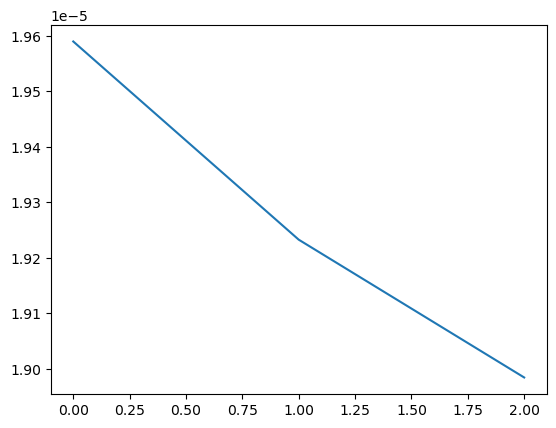

In [124]:

import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [127]:
y_pred = model_nn(X_test_t)

In [128]:
y_pred=y_pred.detach().numpy()

In [129]:
#TODO kell ez? 

X_test[X_test.columns]=X_scaler.inverse_transform(X_test_t)
y_test[y_test.columns] =y_scaler.inverse_transform(y_test_t)

In [130]:
y_pred=y_scaler.inverse_transform(y_pred)


In [131]:
eval_df_nn=evaluate_model(X_test, y_test, y_pred)

In [132]:
eval_df_nn.head()

,TERV_IDOTARTAM,KESES,predictions,Tény,Pred,PE,MAPE,PE1,MAPE1
1224451,60.000001,-0.199998,-0.109433,59.800003,59.890568,-0.151447,0.151447,45.283195,45.283195
311804,120.000002,-0.266666,-0.161355,119.733336,119.838646,-0.087954,0.087954,39.491627,39.491627
1245018,60.000001,0.316669,-0.137107,60.316670,59.862894,0.752321,0.752321,143.296522,143.296522
1036497,60.000001,-0.483334,-0.119287,59.516667,59.880714,-0.611671,0.611671,75.319869,75.319869
792395,120.000002,-0.400002,-0.146060,119.600000,119.853942,-0.212326,0.212326,63.485198,63.485198


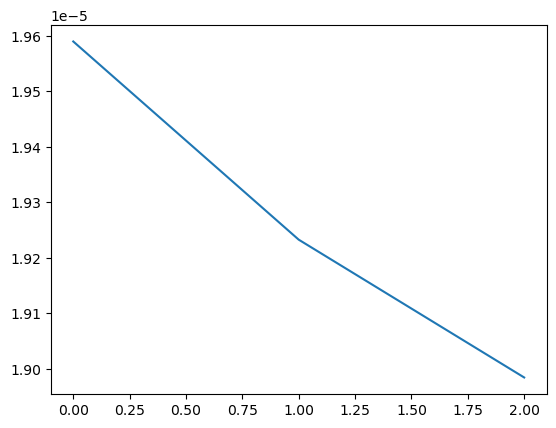

In [135]:
save_NN(model_nn,X_scaler,y_scaler,history,'base')

In [136]:
del model_nn

# Kisebb adaton:

most rendelkezésre álló adat:
- utastájékoztatásból terv- és tényídők
- időjárás

Azaz dobjuk a lassújel és vágányzár adatokat


In [137]:
attrs_to_use=['MENETREND_IDO','ELOZO_KESES','KESES','tx','t','tn','r','TERV_IDOTARTAM','ELOZO VONAT KESES']

In [144]:
raw_data_small=raw_data[attrs_to_use]
def train_and_evaluate_DRT(data):
    history=None
    X_scaler=None
    y_scaler=None
    X_train, X_test, y_train, y_test,_,_ = split_train_test(data)
    model, predictions = train_DRT(X_train,X_test, y_train)
    eval_df = evaluate_model(X_test, y_test, predictions)
    return model,eval_df,X_scaler,y_scaler,history





In [143]:
raw_data_small.head()

,MENETREND_IDO,ELOZO_KESES,KESES,tx,t,tn,r,TERV_IDOTARTAM,ELOZO VONAT KESES
0,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0
1,25.0,0.000000,0.000000,8.5,6.1,3.4,0.0,0.0,0.0
2,29.0,0.400000,0.716667,8.5,6.1,3.4,0.0,240.0,0.0
3,30.0,1.116667,-0.150000,8.5,6.1,3.4,0.0,60.0,0.0
4,35.0,0.966667,-1.133333,8.5,6.1,3.4,0.0,300.0,0.0


In [148]:
model_s,eval_df_s,_,_,_=train_and_evaluate_DRT(raw_data_small)

In [149]:
eval_df_s.head()

,TERV_IDOTARTAM,KESES,predictions,Tény,Pred,PE,MAPE,PE1,MAPE1
1224451,60.0,-0.200000,-0.150000,59.800000,59.850000,-0.083612,0.083612,25.000000,25.000000
311804,120.0,-0.266667,-0.383333,119.733333,119.616667,0.097439,0.097439,-43.750000,43.750000
1245018,60.0,0.316667,0.233333,60.316667,60.233333,0.138160,0.138160,26.315789,26.315789
1036497,60.0,-0.483333,-0.283333,59.516667,59.716667,-0.336040,0.336040,41.379310,41.379310
792395,120.0,-0.400000,-0.033333,119.600000,119.966667,-0.306577,0.306577,91.666667,91.666667


In [150]:
eval_df_s[['PE','PE1']].describe()


C:\Users\ELTE\miniconda3\envs\gtfs_env_311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,PE,PE1
count,418789.000000,4.089260e+05
mean,-0.014418,NaN
std,1.011920,NaN
min,-268.627451,-inf
25%,-0.111982,-2.424242e+01
50%,0.000000,9.302326e+00
75%,0.111307,6.842105e+01
max,48.395914,inf


In [151]:
save_sklearn_model(model_s,'RT','Small')


In [163]:
del model_s

In [152]:
raw_data_small=raw_data[attrs_to_use]
def train_and_evaluate_NN(data, epoch=10, lr=0.0001):
    X_train, X_test, y_train, y_test,X_scaler,y_scaler = split_train_test(data,True)
    X_train_t, X_test_t, y_train_t, y_test_t = get_data_tensors(X_train, X_test, y_train, y_test)
    input_size=X_train.shape[1]
    model = get_NN_model(input_size)
    optimizer, loss_fn = get_optimizer(model, lr)
    history, best_mse, best_weights, model=train_NN(X_train_t, X_test_t, y_train_t, y_test_t, model, loss_fn, optimizer, epoch)
    y_pred = model(X_test_t)
    y_pred=y_pred.detach().numpy()
    X_test[X_test.columns]=X_scaler.inverse_transform(X_test_t)
    y_test[y_test.columns] =y_scaler.inverse_transform(y_test_t)
    y_pred=y_scaler.inverse_transform(y_pred)
    eval_df_nn = evaluate_model(X_test, y_test, y_pred)
    return model,eval_df_nn,X_scaler,y_scaler,history


In [156]:
model_nn_s,eval_df_nn_s,X_scaler_s,y_scaler, history_s=train_and_evaluate_NN(raw_data_small,3)


    

C:\Users\ELTE\AppData\Local\Temp\ipykernel_6884\2956716844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_y[pd_y.columns] = y_scaler.fit_transform(pd_y[pd_y.columns])


Epoch: 0 MSE: 2.0312982087489218e-05 Best mse inf
Epoch: 1 MSE: 1.8248558262712322e-05 Best mse 2.0312982087489218e-05
Epoch: 2 MSE: 1.8054355678032152e-05 Best mse 1.8248558262712322e-05


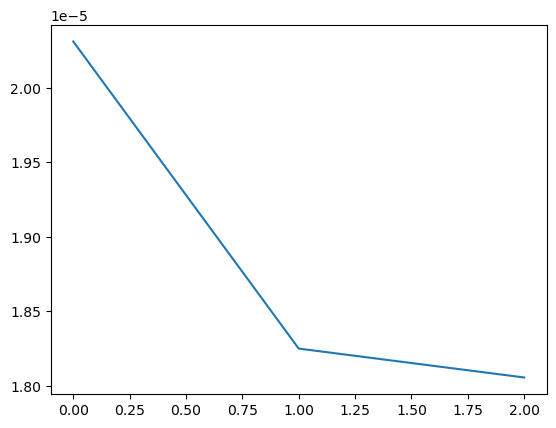

In [157]:
save_NN(model_nn_s,X_scaler_s,y_scaler,history_s,'Small')



In [158]:
eval_df_nn_s.head()

,TERV_IDOTARTAM,KESES,predictions,Tény,Pred,PE,MAPE,PE1,MAPE1
1224451,60.000001,-0.199998,-0.225888,59.800003,59.774113,0.043294,0.043294,-12.944991,12.944991
311804,120.000002,-0.266666,-0.364979,119.733336,119.635023,0.082110,0.082110,-36.867284,36.867284
1245018,60.000001,0.316669,-0.374006,60.316670,59.625995,1.145081,1.145081,218.106433,218.106433
1036497,60.000001,-0.483334,-0.291266,59.516667,59.708735,-0.322712,0.322712,39.738072,39.738072
792395,120.000002,-0.400002,-0.318691,119.600000,119.681311,-0.067986,0.067986,20.327791,20.327791


MSE: 0.00
RMSE: 0.00


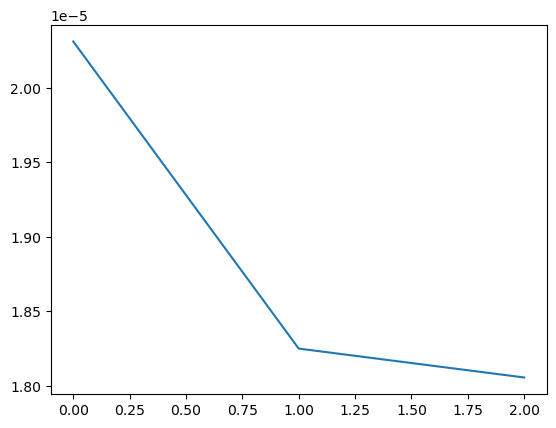

In [159]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history_s)
plt.show()

In [88]:
eval_df_nn_s[['MAPE','MAPE1']].describe()

,MAPE,MAPE1
count,4.187890e+05,4.187890e+05
mean,3.075355e-01,6.680847e+05
std,9.641641e-01,9.131696e+06
min,1.002436e-09,1.103793e-07
25%,4.190919e-02,1.538485e+01
50%,1.116657e-01,4.848440e+01
75%,2.668309e-01,1.199961e+02
max,2.686274e+02,1.043506e+09


In [160]:
del model_nn_s

In [161]:
del raw_data_small
del raw_data
    